## Tensorflow Gradient Boosted Trees 

Notebook for showcasing model usage

In [27]:
import os
import sys
import pandas as pd
# the models dir contains tf_gbt.py
sys.path.append(os.path.join(os.path.abspath(''), "../models"))
from tf_gbt import GradientBoostedTrees

### Model Configurations and Datasets

We wil declare configurations for the model 

In [28]:
data_path = "../data"

output_path = "../submissions"

select_features = ['CryoSleep','Age','RoomService','Cabin_num','FoodCourt', 'ShoppingMall', 'Spa', 'HomePlanet', 'Side', 'Deck', 'Transported', 'VRDeck','Destination']

label = 'Transported'

Let's load the data set. These datasets have undergone preprocessing into tensorflow datasets

In [29]:
## load train and validation dataset

train_df = pd.read_csv(os.path.join(data_path, "train_ds_pd.csv"))
valid_df = pd.read_csv(os.path.join(data_path, "valid_ds_pd.csv"))
test_df = pd.read_csv(os.path.join(data_path, "test_ds_pd.csv"))

### Running TensorFlow Gradient Boosted Trees experiments

We will first instantiate the tensorflow GBT model using the predefined configurations and datasets. 

An autotuner will be use selecting the most optimal hyperparameters

In [30]:
gbt = GradientBoostedTrees(train_df=train_df, valid_df=valid_df, test_df=test_df,label=label)
gbt.feature_selection(selected_features=select_features)
gbt.create_tuner(num_trials=50)
gbt.create_gbt_model()

============ Instantiating GBT class ============
============ Pruning Features ============
============ Creating RandomSearch Tuner ============
============ Instantiating GBT model ============
Use /var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/tmpjrtko3oy as temporary training directory


[WARNING 23-11-06 16:55:08.3453 +08 gradient_boosted_trees.cc:1830] "goss_alpha" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-06 16:55:08.3453 +08 gradient_boosted_trees.cc:1841] "goss_beta" set but "sampling_method" not equal to "GOSS".
[WARNING 23-11-06 16:55:08.3453 +08 gradient_boosted_trees.cc:1855] "selective_gradient_boosting_ratio" set but "sampling_method" not equal to "SELGB".


In [31]:
# run experiment
gbt_model_history = gbt.run_experiments()
print(f"Train Model Accuracy: {gbt_model_history.history['accuracy']}")

# evaluate
gbt_model_evaluation, gbt_model_metrics, gbt_model_classification_report = gbt.evaluate()

============ Running Experiment ============
Reading training dataset...
Training dataset read in 0:00:00.171482. Found 7002 examples.
Training model...
Model trained in 0:02:11.108900
Compiling model...
Model compiled.
Train Model Accuracy: [0.8173912763595581]
============ Evaluating ============
2/2 [==============================] - 0s 5ms/step - loss: 0.0000e+00 - accuracy: 0.8090


[INFO 23-11-06 16:57:19.6614 +08 kernel.cc:1233] Loading model from path /var/folders/g4/mj9t8ccd7bn74b0c25x8xjth0000gn/T/tmpjrtko3oy/model/ with prefix 294b063cd5674975
[INFO 23-11-06 16:57:19.6667 +08 decision_forest.cc:660] Model loaded with 100 root(s), 3092 node(s), and 12 input feature(s).
[INFO 23-11-06 16:57:19.6668 +08 abstract_model.cc:1344] Engine "GradientBoostedTreesGeneric" built
[INFO 23-11-06 16:57:19.6668 +08 kernel.cc:1061] Use fast generic engine


2/2 [==============================] - 0s 5ms/step


Accuracy metric using validation datasets for evaluation

In [32]:
evaluation_accuracy = gbt_model_evaluation['accuracy']
print(f"Test accuracy with the TF-DF hyper-parameter tuner: {evaluation_accuracy:.4f}")

Test accuracy with the TF-DF hyper-parameter tuner: 0.8090


Using sklearn classification report to output common metrics

In [33]:
print(gbt_model_classification_report)

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       849
           1       0.80      0.81      0.81       842

    accuracy                           0.81      1691
   macro avg       0.81      0.81      0.81      1691
weighted avg       0.81      0.81      0.81      1691



In [34]:
gbt_model_predictions, gbt_model_output = gbt.predict()

============ Predicting ============


1/5 [=====>........................] - ETA: 0s

5/5 [==============================] - 0s 5ms/step
Model: "gradient_boosted_trees_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (12):
	Age
	Cabin_num
	CryoSleep
	Deck
	Destination
	FoodCourt
	HomePlanet
	RoomService
	ShoppingMall
	Side
	Spa
	VRDeck

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.          "Age"  0.276545 ################
    2.    "Cabin_num"  0.243013 ##########
    3.    "CryoSleep"  0.231270 ########
    4.    "FoodCourt"  0.226426 #######
    5.  "RoomService"  0.225342 #######
    6.         "Deck"  0.216792 ######
    7.         "Side"  0.196118 ##
    8.          "Spa"  0.193322 ##
    9.  "Destination"  0.189994 #

### Model Visualisations

Training Logs

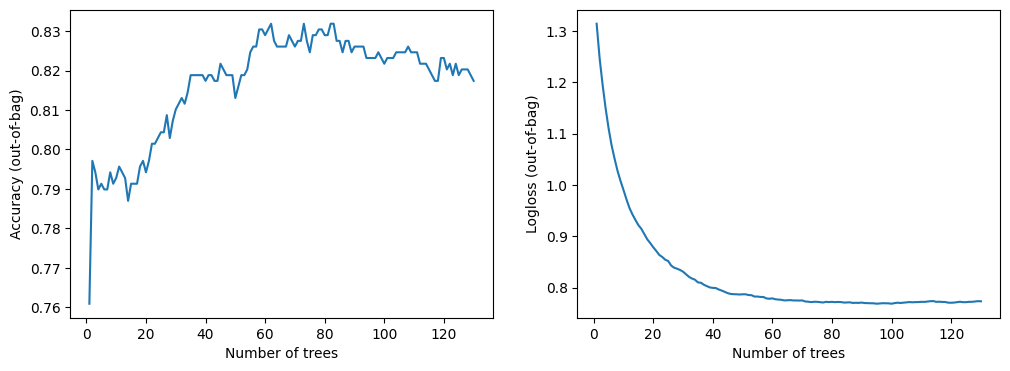

In [35]:
# training logs
gbt_model_training_logs = gbt.plot_training_logs()

Tuning Logs

score                                               -0.768811
evaluation_time                                     37.699482
best                                                     True
split_axis                                     SPARSE_OBLIQUE
sparse_oblique_projection_density_factor                  2.0
sparse_oblique_normalization                          MIN_MAX
sparse_oblique_weights                                 BINARY
categorical_algorithm                                  RANDOM
growing_strategy                            BEST_FIRST_GLOBAL
max_num_nodes                                            16.0
sampling_method                                        RANDOM
subsample                                                 1.0
shrinkage                                                 0.1
min_examples                                                5
use_hessian_gain                                         true
num_candidate_attributes_ratio                            0.5
max_dept

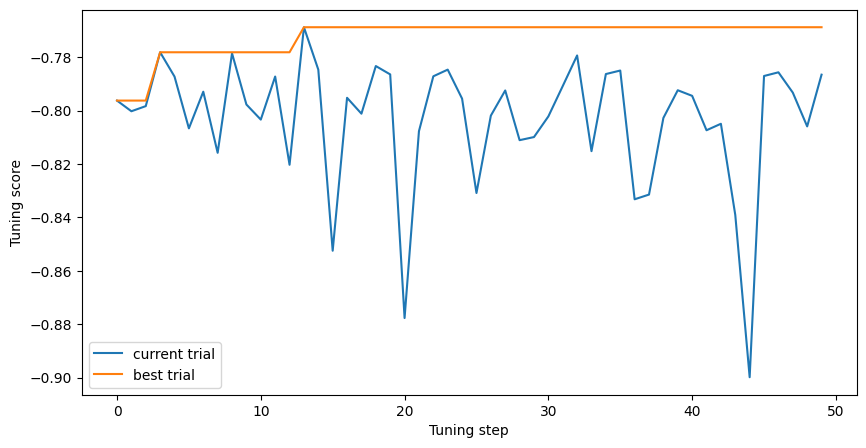

In [36]:
# tuning logs
gbt_model_tuning_logs = gbt.plot_tuning_logs()

Variable Importance

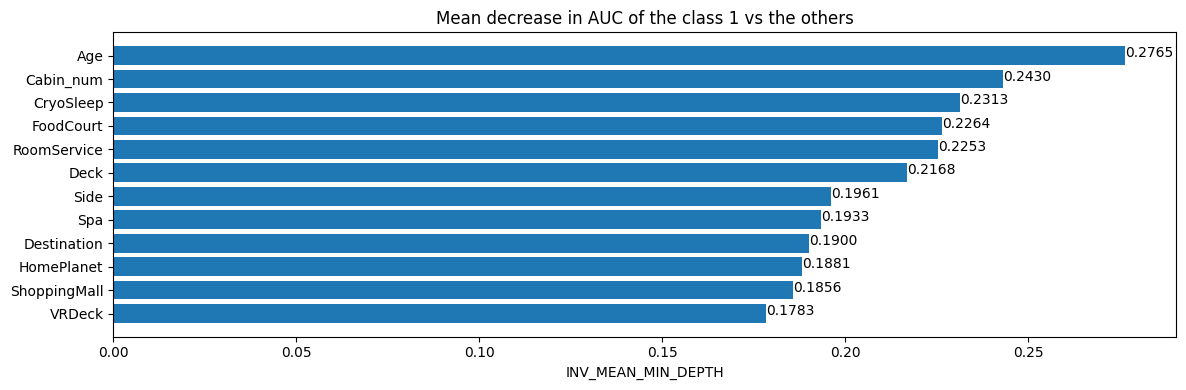

In [37]:
# variable importance
gbt_model_variable_importances = gbt.plot_variable_importances()

Features that were not important were removed from `select_features` which improved model accuracy

### Export output as csv for submission

In [38]:
# os.makedirs(output_path, exist_ok=True) 
# gbt_model_output.to_csv(os.path.join(output_path, "tf_gbt.csv"),index=False)